<a href="https://colab.research.google.com/github/kimdonggyu2008/music_generation/blob/main/chord_progression_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from music21 import *



In [ ]:
!add-apt-repository ppa:mscore-ubuntu/mscore-stable -y
!apt-get update
!apt-get install musescore

!apt-get install xvfb

!sh -e /etc/init.d/x11-common start

import os
os.putenv('DISPLAY', ':99.0')

!start-stop-daemon --start --pidfile /var/run/xvfb.pid --make-pidfile --background --exec /usr/bin/Xvfb -- :99 -screen 0 1024x768x24 -ac +extension GLX +render -noreset

us = environment.UserSettings()
us['musescoreDirectPNGPath'] = '/usr/bin/mscore'
us['directoryScratch'] = '/tmp'

Repository: 'deb https://ppa.launchpadcontent.net/mscore-ubuntu/mscore-stable/ubuntu/ jammy main'
Description:
~~~~~~~~~ MUSESCORE 2 RELEASES FOR UBUNTU 12.04 AND LATER ~~~~~~~~~
Note that Canonical doesn’t allow new builds for releases marked obsolete
(any nōn-LTS predating the previous LTS (currently 24.04 “noble”), and any LTS
older than 7 years, currently anything before 14.04 “trusty”). The packages
for those older releases here can no longer be updated but still work, within
limitations. Best to upgrade to a supported release of the operating system!

INSTALLING: (run these commands from the terminal)
  sudo add-apt-repository ppa:mscore-ubuntu/mscore-stable
  sudo apt-get update
  sudo apt-get install musescore

DO *NOT* USE THESE PPAs on Debian, only on Ubuntu!

‣‣‣ These packages are NOT suitable for ”KDE neon 18.04 (bionic)”!
‣ Use https://build.opensuse.org/project/show/home:mirabile:mscore instead.
⚠ KDE neon 18.04 was discontinued so those packages can no longer be updated

Output after 1 iteration(s): ABC
Output after 2 iteration(s): ABCBAEF
Output after 3 iteration(s): ABCBAEFBAABCEGFD
Output after 4 iteration(s): ABCBAEFBAABCEGFDBAABCABCBAEFEGGFDD


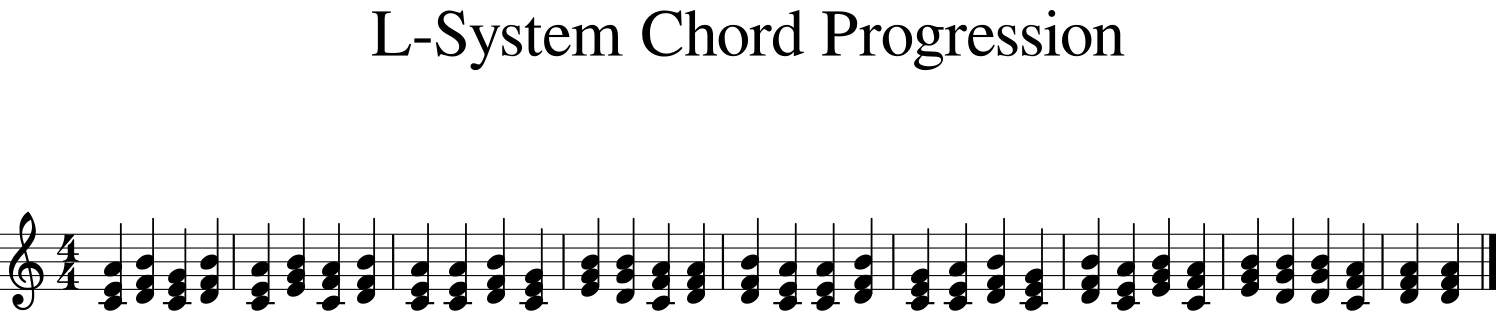

In [ ]:
class LSystem: #시퀀서 시스템 선언

  def __init__(self,axiom,rules): #시작점, 규칙, 결과값 선언
    self.axiom=axiom
    self.rules=rules
    self.output=axiom

  def alphabet(self): #l-system의 알파벳 읽어오고 추가해서 반환함
    return set(self.axiom+"".join(self.rules.values()))

  def iterate(self,n=1):#한번 반복
    for i in range(n):
      next_output=self._iterate_once()#절차 함수 통해서 계산
      self.output=next_output#결과값 갱신
      print(f"Output after {i + 1} iteration(s): {self.output}")
    final_output=self.output#메인에서 지정된 횟수가 끝나면 최종 결과 저장
    self._reset_output()
    return final_output

  def _iterate_once(self):
    symbols=[self._apply_rule(symbol) for symbol in self.output]
    #지금까지의 값에서 하나를 고르고, 해당 값의 룰에 해당하는 밸류값 가져옴
    return "".join(symbols)#밸류값 추가함

  def _apply_rule(self,symbol): #딕셔너리 형태이므로, 이전 값(인덱스)에 해당하는 다음 값(밸류)을 추가함
    return self.rules.get(symbol,symbol)#밸류값 반환

  def _reset_output(self):
    self.output=self.axiom

def l_system_to_music21_chords(chord_sequence): #각 알파벳 별로 지정된 코드 구성음들
    chord_dict={
        "C": ["C", "E", "G"],  # Cmaj
        "D": ["D", "F", "A"],  # Dmin
        "E": ["E", "G", "B"],  # Emin
        "F": ["F", "A", "C"],  # Fmaj
        "G": ["G", "B", "D"],  # Gmaj
        "A": ["A", "C", "E"],  # Amin
        "B": ["B", "D", "F"],  # Bdim
    }
    return [chord.Chord(chord_dict[chord_name]) for chord_name in chord_sequence if chord_name in chord_dict]

def create_and_show_music21_score(music21_chords): #결과 코드진해을 악보로 출력
    score=stream.Score()
    score.metadata=metadata.Metadata(title="L-System Chord Progression")
    part=stream.Part()
    for chord in music21_chords:
      part.append(chord) #각 악기 별 악보
    score.append(part)
    score.show()#musescore에 해당 코드 진행을 띄우기 위함.

def main():
    axiom="A"
    rules={"A": "ABC", "B": "BA", "C": "EF", "F": "GFD"} #지정할 규칙
    l_system=LSystem(axiom,rules)
    chord_sequence=l_system.iterate(4)#4번 반복함
    music21_chords=l_system_to_music21_chords(chord_sequence)
    create_and_show_music21_score(music21_chords)



if __name__=="__main__":
  main()
